In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [371]:
df = pd.read_csv('Media variables 2021-11-18.csv',index_col =0)
df.index = pd.to_datetime(df.index)
media = df.iloc[:,14:]
media

,Search-National Brand,Search-National Generic,Search-GO Brand,Search-GO Generic,Search-Lumino Brand,Search-Lumino Generic,Search-SLGI Brand,Search-SLGI Generic,Search-Other Brand,Search-Other Generic,...,TV-Spec-Brand-GRPs,TV-Spec-Lumino-GRPs,TV-Spec-Spon-GRPs,OOH-Lumino,OOH-Brand,Radio-Brand,Radio-Lumino,Radio-QC,eDirects-SLGI,eDirects-GB
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-22,59754.0,125031.0,110.0,3575.0,0.0,125017.0,0.0,0.0,186.0,14739.0,...,5.51,0.0,0.00,23130336.0,0.0,0.0,0.00,0.0,0.0,0.0
2018-10-29,57271.0,104108.0,100.0,3752.0,0.0,135685.0,0.0,0.0,104.0,17817.0,...,44.18,0.0,0.00,45742058.0,2203168.0,0.0,444.45,0.0,0.0,0.0
2018-11-05,41938.0,74833.0,139.0,3090.0,0.0,135940.0,0.0,0.0,0.0,18849.0,...,77.69,0.0,0.00,48569475.0,2608168.0,0.0,444.32,0.0,0.0,0.0
2018-11-12,38689.0,60305.0,108.0,2033.0,0.0,52676.0,0.0,0.0,0.0,20783.0,...,82.28,0.0,2.47,47643305.0,2608168.0,0.0,444.01,0.0,0.0,0.0
2018-11-19,48682.0,88334.0,189.0,2895.0,0.0,73479.0,0.0,0.0,0.0,20169.0,...,84.98,0.0,1.64,49494776.0,2608168.0,0.0,443.22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,139471.0,0.0,4106.0,14466.0,2965.0,76924.0,1319.0,39496.0,47.0,4787.0,...,1.74,0.0,0.00,0.0,0.0,0.0,0.00,0.0,4304.0,0.0
2021-10-04,142743.0,0.0,4418.0,16436.0,2765.0,73310.0,1744.0,30142.0,66.0,6928.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9892.0,967.0
2021-10-11,143109.0,0.0,4392.0,19032.0,2723.0,60068.0,2062.0,63449.0,53.0,5936.0,...,52.98,0.0,0.00,0.0,0.0,0.0,0.00,0.0,2533.0,0.0


In [446]:
features = media.columns
features

Index(['Search-National Brand', 'Search-National Generic', 'Search-GO Brand',
       'Search-GO Generic', 'Search-Lumino Brand', 'Search-Lumino Generic',
       'Search-SLGI Brand', 'Search-SLGI Generic', 'Search-Other Brand',
       'Search-Other Generic', 'Social-Brand', 'Social-GO', 'Social-Lumino',
       'Social-Sponsorship', 'Social-Other', 'Display-Brand', 'Display-Lumino',
       'Display-GO', 'Display-Sponsorship', 'Display-Other', 'Native-Brand',
       'Native-Lumino', 'Native-GO', 'Native-Sponsorship', 'Native-Other',
       'Video-Brand', 'Video-Lumino', 'Video-Sponsorship', 'Video-Other',
       'DigitalAudio-Brand', 'DigitalAudio-Lumino', 'DigitalAudio-Other',
       'TV-Total-Brand-Imps', 'TV-Total-Lumino-Imps', 'TV-Total-Spon-Imps',
       'TV-Conv-Brand-Imps', 'TV-Conv-Lumino-Imps', 'TV-Spec-Brand-Imps',
       'TV-Spec-Lumino-Imps', 'TV-Spec-Spon-Imps', 'TV-Total-Brand-GRPs',
       'TV-Total-Lumino-GRPs', 'TV-Total-Spon-GRPs', 'TV-Conv-Brand-GRPs',
       'TV-Conv-L

### Model Build

In [373]:
start_date = '2018-10-22'
end_date = '2021-06-28'
end_formatted = datetime.datetime.strptime(end_date, "%Y-%m-%d")

yvar = 'FAA Lead Form Impressions'
X = np.array(media.loc[start_date:end_date])
y = np.array(df.loc[start_date:end_date][yvar])

X_test = np.array(media.loc[end_formatted+datetime.timedelta(days=7):max(media.index)])
y_test = np.array(df.loc[end_formatted+datetime.timedelta(days=7):max(df.index)][yvar])
X

array([[59754.00, 125031.00, 110.00, ..., 0.00, 0.00, 0.00],
       [57271.00, 104108.00, 100.00, ..., 0.00, 0.00, 0.00],
       [41938.00, 74833.00, 139.00, ..., 0.00, 0.00, 0.00],
       ...,
       [31909.00, 0.00, 3795.00, ..., 0.00, 0.00, 0.00],
       [78187.00, 0.00, 3472.00, ..., 0.00, 0.00, 0.00],
       [73467.00, 0.00, 2084.00, ..., 0.00, 0.00, 0.00]])

In [386]:
pipe_rr = Pipeline([
    ('sc',MinMaxScaler()),
    ('reg',Ridge())
])

In [389]:
param_range = {'reg__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_reg = Ridge()

In [390]:
RR = GridSearchCV(estimator = pipe_rr,
                  param_grid = param_range, 
                  scoring = 'neg_mean_squared_error',
                  n_jobs = -1,
                  cv = 10)

In [391]:
RR.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', MinMaxScaler()),
                                       ('reg', Ridge())]),
             n_jobs=-1,
             param_grid={'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                        100.0, 1000.0]},
             scoring='neg_mean_squared_error')

In [392]:
RR.cv_results_

{'mean_fit_time': array([0.07, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'std_fit_time': array([0.04, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'mean_score_time': array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'std_score_time': array([0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'param_reg__alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg__alpha': 0.0001},
  {'reg__alpha': 0.001},
  {'reg__alpha': 0.01},
  {'reg__alpha': 0.1},
  {'reg__alpha': 1.0},
  {'reg__alpha': 10.0},
  {'reg__alpha': 100.0},
  {'reg__alpha': 1000.0}],
 'split0_test_score': array([-3848274.23, -3622969.35, -3355625.87, -1977183.83, -1314936.79,
        -2563286.70, -2073634.87, -1716253.27]),
 'split1_test_score': array([-899005.88, -784918.43, -734606.70, -530095.52, -497700.18,
        -473209.42, -79874.81, -18375

In [393]:
RR.best_params_

{'reg__alpha': 1.0}

In [395]:
coef = RR.best_estimator_['reg'].coef_
coef

array([813.94, 1198.36, -1113.81, -522.82, 144.17, 175.99, -1647.76,
       -919.92, -305.07, 253.94, 1431.16, -374.85, -406.92, 194.25,
       -781.42, -2103.64, -638.44, -591.85, -750.83, 612.51, 515.58,
       -239.86, -46.03, 438.21, -150.28, 500.27, -105.64, -448.89,
       -287.78, -399.61, -1049.63, 10.72, 61.04, -20.45, -140.01, 414.68,
       -36.17, -114.87, -9.58, -140.01, 57.13, -20.49, -145.37, 421.30,
       -36.10, -123.44, -9.71, -144.91, -135.98, 1170.34, 1114.69,
       -853.42, -161.91, 446.78, 195.26])

In [396]:
np.sqrt(-RR.best_score_)

1411.1502498548155

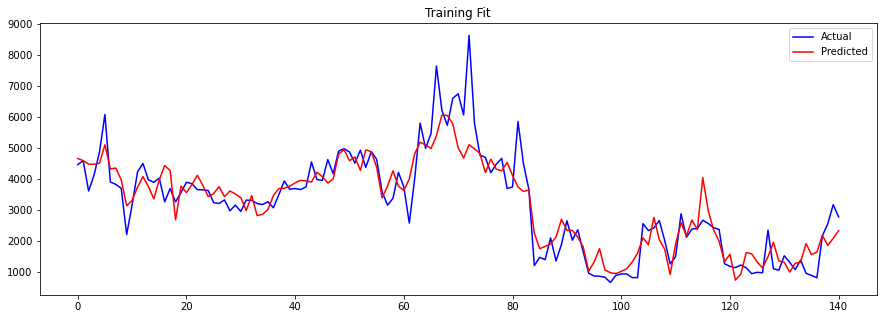

In [397]:
tp = RR.best_estimator_.predict(X)
ty = y

fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(X.shape[0]),ty,'b-',label='Actual')
plt.plot(np.arange(X.shape[0]),tp,'r-',label='Predicted')
plt.legend()
plt.title('Training Fit')
plt.show()

In [398]:
def rmse(a,p):
    return np.sqrt(mse(a,p))

1648.8435419778205


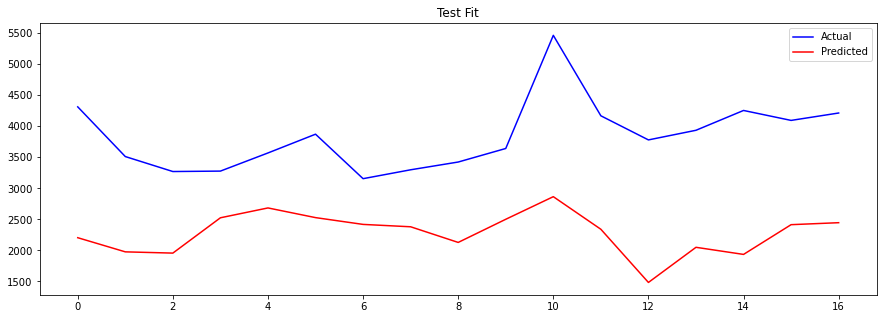

In [399]:
testp = RR.best_estimator_.predict(X_test)
testy = y_test
test_rmse = rmse(testy,testp)

print (test_rmse)
fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(X_test.shape[0]),testy,'b-',label='Actual')
plt.plot(np.arange(X_test.shape[0]),testp,'r-',label='Predicted')
plt.legend()
plt.title('Test Fit')
plt.show()

### Getting Contributions

In [402]:
coef = RR.best_estimator_['reg'].coef_
sc = MinMaxScaler()
X_scaled = sc.fit(X).transform(X)
X_scaled

array([[0.32, 0.83, 0.01, ..., 0.00, 0.00, 0.00],
       [0.30, 0.69, 0.01, ..., 0.00, 0.00, 0.00],
       [0.20, 0.50, 0.01, ..., 0.00, 0.00, 0.00],
       ...,
       [0.13, 0.00, 0.29, ..., 0.00, 0.00, 0.00],
       [0.45, 0.00, 0.26, ..., 0.00, 0.00, 0.00],
       [0.41, 0.00, 0.16, ..., 0.00, 0.00, 0.00]])

In [403]:
contr = np.sum(coef * X_scaled ,axis = 0)
contr

array([42290.70, 41123.17, -26211.77, -9285.24, 7153.76, 6516.92,
       -46618.99, -12825.50, -14449.24, 11223.58, 67378.59, -6234.08,
       -5950.43, 1198.33, -18660.74, -53527.90, -14195.91, -4016.05,
       -15274.79, 12512.13, 8088.70, -3292.24, -198.16, 1714.74, -1061.34,
       7214.85, -1773.63, -9370.72, -3953.16, -3534.80, -23384.58, 58.41,
       1774.59, -105.71, -896.46, 8345.21, -219.28, -3418.42, -42.63,
       -896.46, 1684.90, -105.83, -944.78, 8590.09, -218.85, -3728.66,
       -43.08, -941.48, -831.77, 8392.79, 8217.51, -3410.22, -263.19,
       5994.77, 638.49])

In [408]:
base = RR.best_estimator_['reg'].intercept_ * X.shape[0]
base

488231.8805289312

In [409]:
base + sum(contr)

448457.99999999994

In [410]:
sum(ty)

448458.0

In [411]:
brand_filter = features.str.contains("Brand")
brand_filter

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False])

In [412]:
nonbrand_filter = ~brand_filter
nonbrand_filter

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True])

In [416]:
brand_contr = contr[brand_filter]
brand_dict = {}
for var, cont in zip(features[brand_filter], brand_contr):
    brand_dict.update({var : cont})
brand_dict

{'Search-National Brand': 42290.702069508596,
 'Search-GO Brand': -26211.772507904636,
 'Search-Lumino Brand': 7153.764017357204,
 'Search-SLGI Brand': -46618.98995774517,
 'Search-Other Brand': -14449.244139811504,
 'Social-Brand': 67378.58518001644,
 'Display-Brand': -53527.90005898064,
 'Native-Brand': 8088.699551847167,
 'Video-Brand': 7214.848219898485,
 'DigitalAudio-Brand': -3534.80431630273,
 'TV-Total-Brand-Imps': 1774.5898262699166,
 'TV-Conv-Brand-Imps': 8345.20862331268,
 'TV-Spec-Brand-Imps': -3418.4162220566504,
 'TV-Total-Brand-GRPs': 1684.900887360164,
 'TV-Conv-Brand-GRPs': 8590.088693897304,
 'TV-Spec-Brand-GRPs': -3728.655660202766,
 'OOH-Brand': 8392.790074138322,
 'Radio-Brand': 8217.51381496716}

In [418]:
nonbrand_contr = contr[nonbrand_filter]
nonbrand_dict = {}
for var, cont in zip(features[nonbrand_filter], nonbrand_contr):
    nonbrand_dict.update({var : cont})
nonbrand_dict

{'Search-National Generic': 41123.17066869374,
 'Search-GO Generic': -9285.237801819094,
 'Search-Lumino Generic': 6516.920452432514,
 'Search-SLGI Generic': -12825.498887311956,
 'Search-Other Generic': 11223.575880431596,
 'Social-GO': -6234.08183725705,
 'Social-Lumino': -5950.425857115557,
 'Social-Sponsorship': 1198.3257611350282,
 'Social-Other': -18660.744003065745,
 'Display-Lumino': -14195.912851934996,
 'Display-GO': -4016.0483217765686,
 'Display-Sponsorship': -15274.790456355338,
 'Display-Other': 12512.125157803272,
 'Native-Lumino': -3292.2367719994113,
 'Native-GO': -198.16271526382758,
 'Native-Sponsorship': 1714.7436170936521,
 'Native-Other': -1061.3366062072805,
 'Video-Lumino': -1773.6279154746044,
 'Video-Sponsorship': -9370.722317844726,
 'Video-Other': -3953.1583735269687,
 'DigitalAudio-Lumino': -23384.58162311913,
 'DigitalAudio-Other': 58.40645303958947,
 'TV-Total-Lumino-Imps': -105.71010164966052,
 'TV-Total-Spon-Imps': -896.4605123471334,
 'TV-Conv-Lumino-I

## Lasso Regression

In [421]:
param_range_lasso = {'lreg__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [422]:
pipe_lr = Pipeline([
    ('sc',MinMaxScaler()),
    ('lreg',Lasso())
])

In [426]:
LR = GridSearchCV(estimator = pipe_lr,
                  param_grid = param_range_lasso, 
                  scoring = 'neg_mean_squared_error',
                  n_jobs = -1,
                  cv = 10)

In [428]:
LR.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', MinMaxScaler()),
                                       ('lreg', Lasso())]),
             n_jobs=-1,
             param_grid={'lreg__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0]},
             scoring='neg_mean_squared_error')

In [430]:
LR.cv_results_

{'mean_fit_time': array([0.04, 0.06, 0.06, 0.03, 0.02, 0.01, 0.00, 0.00]),
 'std_fit_time': array([0.01, 0.02, 0.02, 0.01, 0.01, 0.00, 0.00, 0.00]),
 'mean_score_time': array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'std_score_time': array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
 'param_lreg__alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'lreg__alpha': 0.0001},
  {'lreg__alpha': 0.001},
  {'lreg__alpha': 0.01},
  {'lreg__alpha': 0.1},
  {'lreg__alpha': 1.0},
  {'lreg__alpha': 10.0},
  {'lreg__alpha': 100.0},
  {'lreg__alpha': 1000.0}],
 'split0_test_score': array([-3604967.13, -3600042.31, -3572507.01, -3417906.52, -2663655.86,
        -1875914.04, -1592892.44, -1657611.76]),
 'split1_test_score': array([-782805.88, -782456.85, -774396.58, -728589.26, -527590.91,
        -585687.61, -254146.

In [432]:
LR.best_params_

{'lreg__alpha': 10.0}

In [439]:
lcoef = LR.best_estimator_['lreg'].coef_
lcoef

array([43.34, 1369.80, -939.11, -16.18, 0.00, 0.00, -1901.10, -159.27,
       -0.00, 36.44, 1674.91, -0.00, -0.00, -0.00, -803.46, -2598.21,
       -341.77, -469.71, -546.10, 367.79, 97.90, -0.00, -0.00, 0.00,
       -0.00, 0.00, -0.00, -240.15, -60.63, -406.44, -584.19, 0.00, 0.00,
       0.00, -0.00, 0.00, 0.00, -0.00, 0.00, -0.00, 0.00, 0.00, -0.00,
       562.15, 0.00, -0.00, 0.00, -0.00, -0.00, 848.67, 1469.90, -1090.83,
       -0.00, 330.35, 0.00])

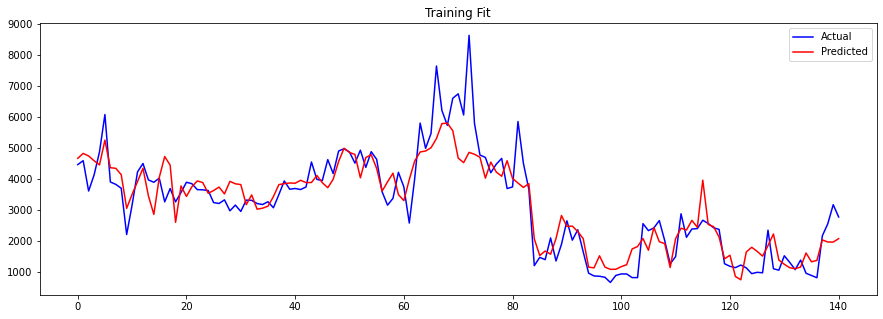

1261.188406594431


In [436]:
tp = LR.best_estimator_.predict(X)
ty = y

fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(X.shape[0]),ty,'b-',label='Actual')
plt.plot(np.arange(X.shape[0]),tp,'r-',label='Predicted')
plt.legend()
plt.title('Training Fit')
plt.show()
print (np.sqrt(-LR.best_score_))

1773.5202086395468


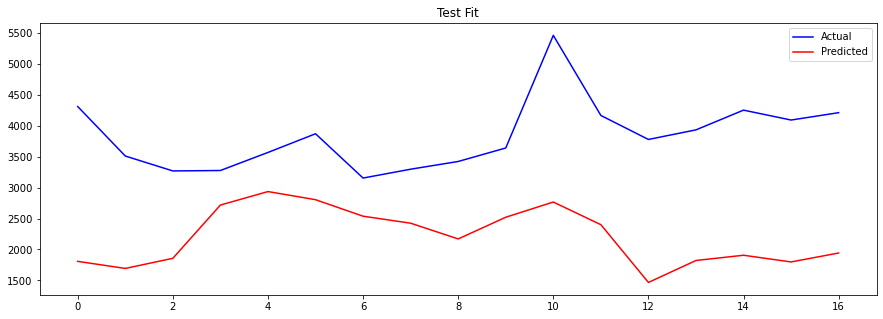

In [437]:
testp = LR.best_estimator_.predict(X_test)
testy = y_test
test_rmse = rmse(testy,testp)

print (test_rmse)
fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(X_test.shape[0]),testy,'b-',label='Actual')
plt.plot(np.arange(X_test.shape[0]),testp,'r-',label='Predicted')
plt.legend()
plt.title('Test Fit')
plt.show()

### Getting Contributions

In [438]:
sc = MinMaxScaler()
X_scaled = sc.fit(X).transform(X)
X_scaled

array([[0.32, 0.83, 0.01, ..., 0.00, 0.00, 0.00],
       [0.30, 0.69, 0.01, ..., 0.00, 0.00, 0.00],
       [0.20, 0.50, 0.01, ..., 0.00, 0.00, 0.00],
       ...,
       [0.13, 0.00, 0.29, ..., 0.00, 0.00, 0.00],
       [0.45, 0.00, 0.26, ..., 0.00, 0.00, 0.00],
       [0.41, 0.00, 0.16, ..., 0.00, 0.00, 0.00]])

In [440]:
lcontr = np.sum(lcoef * X_scaled ,axis = 0)
lcontr

array([2252.05, 47006.44, -22100.46, -287.33, 0.00, 0.00, -53786.52,
       -2220.52, 0.00, 1610.42, 78853.93, 0.00, 0.00, 0.00, -19186.98,
       -66112.38, -7599.43, -3187.25, -11109.83, 7513.18, 1535.98, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, -5013.25, -832.84, -3595.29,
       -13015.24, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 11461.94, 0.00, 0.00, 0.00, 0.00, 0.00, 6085.99,
       10836.14, -4358.90, 0.00, 4432.54, 0.00])

In [441]:
brand_contr = lcontr[brand_filter]
brand_dict = {}
for var, cont in zip(features[brand_filter], brand_contr):
    brand_dict.update({var : cont})
brand_dict

{'Search-National Brand': 2252.0467609120515,
 'Search-GO Brand': -22100.46467723604,
 'Search-Lumino Brand': 0.0,
 'Search-SLGI Brand': -53786.51647256679,
 'Search-Other Brand': 0.0,
 'Social-Brand': 78853.92538310675,
 'Display-Brand': -66112.37568433145,
 'Native-Brand': 1535.9822314095366,
 'Video-Brand': 0.0,
 'DigitalAudio-Brand': -3595.285115769001,
 'TV-Total-Brand-Imps': 0.0,
 'TV-Conv-Brand-Imps': 0.0,
 'TV-Spec-Brand-Imps': 0.0,
 'TV-Total-Brand-GRPs': 0.0,
 'TV-Conv-Brand-GRPs': 11461.935264535961,
 'TV-Spec-Brand-GRPs': 0.0,
 'OOH-Brand': 6085.992580595138,
 'Radio-Brand': 10836.14191075174}

In [442]:
nonbrand_contr = lcontr[nonbrand_filter]
nonbrand_dict = {}
for var, cont in zip(features[nonbrand_filter], nonbrand_contr):
    nonbrand_dict.update({var : cont})
nonbrand_dict

{'Search-National Generic': 47006.44087123153,
 'Search-GO Generic': -287.33409258549307,
 'Search-Lumino Generic': 0.0,
 'Search-SLGI Generic': -2220.5232366724554,
 'Search-Other Generic': 1610.4154663739964,
 'Social-GO': 0.0,
 'Social-Lumino': 0.0,
 'Social-Sponsorship': 0.0,
 'Social-Other': -19186.97761940262,
 'Display-Lumino': -7599.427542756579,
 'Display-GO': -3187.2476210049613,
 'Display-Sponsorship': -11109.828910663107,
 'Display-Other': 7513.17770689956,
 'Native-Lumino': 0.0,
 'Native-GO': 0.0,
 'Native-Sponsorship': 0.0,
 'Native-Other': 0.0,
 'Video-Lumino': 0.0,
 'Video-Sponsorship': -5013.250803707856,
 'Video-Other': -832.8385105978007,
 'DigitalAudio-Lumino': -13015.24156573751,
 'DigitalAudio-Other': 0.0,
 'TV-Total-Lumino-Imps': 0.0,
 'TV-Total-Spon-Imps': 0.0,
 'TV-Conv-Lumino-Imps': 0.0,
 'TV-Spec-Lumino-Imps': 0.0,
 'TV-Spec-Spon-Imps': 0.0,
 'TV-Total-Lumino-GRPs': 0.0,
 'TV-Total-Spon-GRPs': 0.0,
 'TV-Conv-Lumino-GRPs': 0.0,
 'TV-Spec-Lumino-GRPs': 0.0,
 'T

In [443]:
total_dict = {}
for var, cont in zip(features, lcontr):
    total_dict.update({var : cont})
total_dict

{'Search-National Brand': 2252.0467609120515,
 'Search-National Generic': 47006.44087123153,
 'Search-GO Brand': -22100.46467723604,
 'Search-GO Generic': -287.33409258549307,
 'Search-Lumino Brand': 0.0,
 'Search-Lumino Generic': 0.0,
 'Search-SLGI Brand': -53786.51647256679,
 'Search-SLGI Generic': -2220.5232366724554,
 'Search-Other Brand': 0.0,
 'Search-Other Generic': 1610.4154663739964,
 'Social-Brand': 78853.92538310675,
 'Social-GO': 0.0,
 'Social-Lumino': 0.0,
 'Social-Sponsorship': 0.0,
 'Social-Other': -19186.97761940262,
 'Display-Brand': -66112.37568433145,
 'Display-Lumino': -7599.427542756579,
 'Display-GO': -3187.2476210049613,
 'Display-Sponsorship': -11109.828910663107,
 'Display-Other': 7513.17770689956,
 'Native-Brand': 1535.9822314095366,
 'Native-Lumino': 0.0,
 'Native-GO': 0.0,
 'Native-Sponsorship': 0.0,
 'Native-Other': 0.0,
 'Video-Brand': 0.0,
 'Video-Lumino': 0.0,
 'Video-Sponsorship': -5013.250803707856,
 'Video-Other': -832.8385105978007,
 'DigitalAudio-Br

In [447]:
wow_contr = lcoef * X_scaled 
wow_contr.shape

(141, 55)

In [454]:
contr_table = pd.DataFrame(wow_contr,columns = features).set_index(df[start_date:end_date].index)

## Putting it all Together

In [49]:
## Splitting into train and test 

def rmse(a,p):
    return np.sqrt(mse(a,p))

def build_model(yvar,start_date,end_date):
    xvar = features[~features.str.contains(yvar)]
    media = df.loc[:,xvar]
    end_formatted = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    X = np.array(media.loc[start_date:end_date])
    y = np.array(df.loc[start_date:end_date][yvar])

    X_test = np.array(media.loc[end_formatted+datetime.timedelta(days=7):max(media.index)])
    y_test = np.array(df.loc[end_formatted+datetime.timedelta(days=7):max(df.index)][yvar])
    

    ## Model Build and Fit
    param_range_lasso = {'lreg__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

    pipe_lr = Pipeline([
        ('sc',MinMaxScaler()),
        ('lreg',Lasso())
        ])

    LR = GridSearchCV(estimator = pipe_lr,
                  param_grid = param_range_lasso, 
                  scoring = 'neg_mean_squared_error',
                  n_jobs = -1,
                  cv = 10)

    LR.fit(X,y)

    ## Model Validation 


    #### Training validation
    trainp = LR.best_estimator_.predict(X)
    trainy = y
    train_rmse = np.sqrt(-LR.best_score_)

    #### Testing validation 
    testp = LR.best_estimator_.predict(X_test)
    testy = y_test
    test_rmse = rmse(testy,testp)

    ## Getting Contributions

    sc = MinMaxScaler()
    X_scaled = sc.fit(X).transform(X)
    lcoef = LR.best_estimator_['lreg'].coef_
    wow_contr = lcoef * X_scaled 
    media_contr = pd.DataFrame(wow_contr,columns = xvar).set_index(df[start_date:end_date].index)
    intercept = LR.best_estimator_['lreg'].intercept_
    base_contr = pd.DataFrame([intercept]*X.shape[0], columns = ["Base"],index =df[start_date:end_date].index)
    contr_table = media_contr.join(base_contr)
    
    return train_rmse, trainp, trainy, test_rmse, testp, testy, contr_table

In [50]:
yvar = 'FAA Lead Form Impressions'
start_date = '2018-10-22'
end_date = '2021-06-28'

In [51]:
df = pd.read_csv('Media variables 2021-11-18.csv',index_col =0)
df.index = pd.to_datetime(df.index)
features = df.columns

In [52]:
train_rmse, trainp, trainy, test_rmse, testp, testy, contr_table = build_model(yvar,start_date,end_date)

In [53]:
train_rmse

1261.188406594431

In [54]:
contr_table

,Search-National Brand,Search-National Generic,Search-GO Brand,Search-GO Generic,Search-Lumino Brand,Search-Lumino Generic,Search-SLGI Brand,Search-SLGI Generic,Search-Other Brand,Search-Other Generic,...,TV-Spec-Lumino-GRPs,TV-Spec-Spon-GRPs,OOH-Lumino,OOH-Brand,Radio-Brand,Radio-Lumino,Radio-QC,eDirects-SLGI,eDirects-GB,Base
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-22,13.798886,1143.271874,-6.841808,-0.259870,0.0,0.0,-0.000000,-0.000000,-0.0,10.274691,...,0.0,-0.0,-0.0,0.000000,0.0,-0.000000,-0.0,0.000000,0.0,3470.039831
2018-10-29,13.054726,951.953901,-6.129120,-0.285467,0.0,0.0,-0.000000,-0.000000,-0.0,12.420393,...,0.0,-0.0,-0.0,44.775298,0.0,-1090.830407,-0.0,0.000000,0.0,3470.039831
2018-11-05,8.459393,684.266015,-8.908604,-0.189733,0.0,0.0,-0.000000,-0.000000,-0.0,13.139810,...,0.0,-0.0,-0.0,53.006171,0.0,-1090.511343,-0.0,0.000000,0.0,3470.039831
2018-11-12,7.485661,551.423330,-6.699270,-0.036876,0.0,0.0,-0.000000,-0.000000,-0.0,14.488019,...,0.0,-0.0,-0.0,53.006171,0.0,-1089.750499,-0.0,0.000000,0.0,3470.039831
2018-11-19,10.480584,807.717907,-12.472046,-0.161533,0.0,0.0,-0.000000,-0.000000,-0.0,14.059994,...,0.0,-0.0,-0.0,53.006171,0.0,-1087.811572,-0.0,0.000000,0.0,3470.039831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,25.418039,30.165750,-154.011945,-0.169631,0.0,0.0,-1235.584011,-33.941238,-0.0,13.020604,...,0.0,-0.0,-0.0,0.000000,0.0,-0.000000,-0.0,25.951834,0.0,3470.039831
2021-06-07,21.371161,0.000000,-231.196090,-0.555459,0.0,0.0,-491.543780,-11.794320,-0.0,11.748380,...,0.0,-0.0,-0.0,0.000000,0.0,-0.000000,-0.0,0.000000,0.0,3470.039831
2021-06-14,5.453680,0.000000,-269.467452,-0.611714,0.0,0.0,-492.411465,-14.692650,-0.0,10.062770,...,0.0,-0.0,-0.0,0.000000,0.0,-0.000000,-0.0,0.000000,0.0,3470.039831


In [32]:
xvar = features[~features.str.contains(yvar)]

In [38]:
xvar.append(pd.Index(["Base"]))

Index(['Search-National Brand', 'Search-National Generic', 'Search-GO Brand',
       'Search-GO Generic', 'Search-Lumino Brand', 'Search-Lumino Generic',
       'Search-SLGI Brand', 'Search-SLGI Generic', 'Search-Other Brand',
       'Search-Other Generic', 'Social-Brand', 'Social-GO', 'Social-Lumino',
       'Social-Sponsorship', 'Social-Other', 'Display-Brand', 'Display-Lumino',
       'Display-GO', 'Display-Sponsorship', 'Display-Other', 'Native-Brand',
       'Native-Lumino', 'Native-GO', 'Native-Sponsorship', 'Native-Other',
       'Video-Brand', 'Video-Lumino', 'Video-Sponsorship', 'Video-Other',
       'DigitalAudio-Brand', 'DigitalAudio-Lumino', 'DigitalAudio-Other',
       'TV-Total-Brand-Imps', 'TV-Total-Lumino-Imps', 'TV-Total-Spon-Imps',
       'TV-Conv-Brand-Imps', 'TV-Conv-Lumino-Imps', 'TV-Spec-Brand-Imps',
       'TV-Spec-Lumino-Imps', 'TV-Spec-Spon-Imps', 'TV-Total-Brand-GRPs',
       'TV-Total-Lumino-GRPs', 'TV-Total-Spon-GRPs', 'TV-Conv-Brand-GRPs',
       'TV-Conv-L